<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=150505173" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 31.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 31.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 3.1 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=909d2b5da777b18f10e5d0b467b2ff425261f4b94532938bc99c21166263dcaa
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.158882,1.818907,0.119264,1.897110,14.116234,12.507753,14.599841,17.558670,2.298415,0.637008,...,0.139145,4.185068,3.879685,3.966014,3.762824,0.430111,6.332422,0.455730,0.937302,0.000663
2014-11-25,12.044562,1.819135,0.119668,1.901869,14.117357,12.537065,14.638675,17.612189,2.300905,0.638969,...,0.138814,4.219553,3.880207,3.978962,3.763224,0.430407,6.362609,0.456400,0.940718,0.000661
2014-11-26,12.045241,1.818037,0.119896,1.907586,14.105823,12.535153,14.672870,17.642281,2.297976,0.640026,...,0.138700,4.222921,3.877676,3.999723,3.759247,0.430844,6.383881,0.456573,0.942084,0.000660
2014-11-27,12.057180,1.823885,0.119971,1.903088,14.143228,12.472965,14.664869,17.626582,2.303345,0.638699,...,0.139068,4.218837,3.888066,3.987153,3.769216,0.431591,6.411255,0.457784,0.944582,0.000662
2014-11-28,12.073241,1.829153,0.119494,1.908586,14.197549,12.430126,14.700956,17.679930,2.311237,0.640546,...,0.139808,4.241239,3.902999,3.997058,3.783188,0.432457,6.395869,0.458281,0.948463,0.000667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-07,13.897457,2.760711,0.143465,1.972437,21.604867,15.674102,23.980603,23.094885,2.967691,0.939121,...,0.075412,5.211895,5.935403,4.655619,5.762373,0.608245,0.759120,0.666673,0.590781,0.000888
2023-11-08,13.847959,2.765813,0.143059,1.977544,21.639677,15.664872,24.031605,23.144805,2.971915,0.940836,...,0.075542,5.220292,5.944966,4.668050,5.771966,0.609568,0.761095,0.667747,0.591733,0.000888
2023-11-09,13.811144,2.772472,0.143156,1.977576,21.681566,15.683804,24.000614,23.134382,2.977134,0.943183,...,0.075688,5.230397,5.956474,4.657594,5.783602,0.606987,0.762458,0.669040,0.592878,0.000891


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== AUD ========================================
2023-11-13 10:07:04,797 - Unknown integration target: 
2023-11-13 10:07:13,106 - Unknown integration target: 
2023-11-13 10:07:21,845 - Unknown integration target: 
2023-11-13 10:07:29,953 - Unknown integration target: 
2023-11-13 10:07:38,257 - Unknown integration target: 
2023-11-13 10:07:56,997 - Unknown integration target: 
2023-11-13 10:08:15,554 - Unknown integration target: 
2023-11-13 10:08:34,082 - Unknown integration target: 
2023-11-13 10:08:36,618 - Unknown integration target: 
2023-11-13 10:08:36,621 - Unknown integration target: 
2023-11-13 10:08:46,152 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 263.8 MiB
2023-11-13 10:08:46,158 - ApiComposer - Initial pipeline was fitted in 6.9 sec.
2023-11-13 10:08:46,162 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 10:16:37,217 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [07:50<?, ?gen/s]

2023-11-13 10:16:37,259 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


2023-11-13 10:17:34,346 - PipelineTuner - Initial pipeline: {'depth': 9, 'length': 9, 'nodes': [linear, linear, ridge, lagged, data_source_ts/AUD, linear, decompose, linear, decompose]}
linear - {}
linear - {}
ridge - {}
lagged - {'window_size': 10}
data_source_ts/AUD - {}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.046
 70%|███████   | 7/10 [06:46<02:54, 58.11s/trial, best loss: 0.04506959766283871]
2023-11-13 10:24:21,145 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-13 10:25:13,622 - PipelineTuner - Final pipeline: {'depth': 9, 'length': 9, 'nodes': [linear, linear, ridge, lagged, data_source_ts/AUD, linear, decompose, linear, decompose]}
linear - {}
linear - {}
ridge - {'alpha': 7.528873213246815}
lagged - {'window_size': 10}
data_source_ts/AUD - {}
linear - {}
decompose - {}
linear - {}
decompose - {}
2023-11-13 10:25:13,625 - PipelineTuner - Final metric: 0.045
2023-11-13 10:25:13,629 - ApiComposer - Hyperparamet

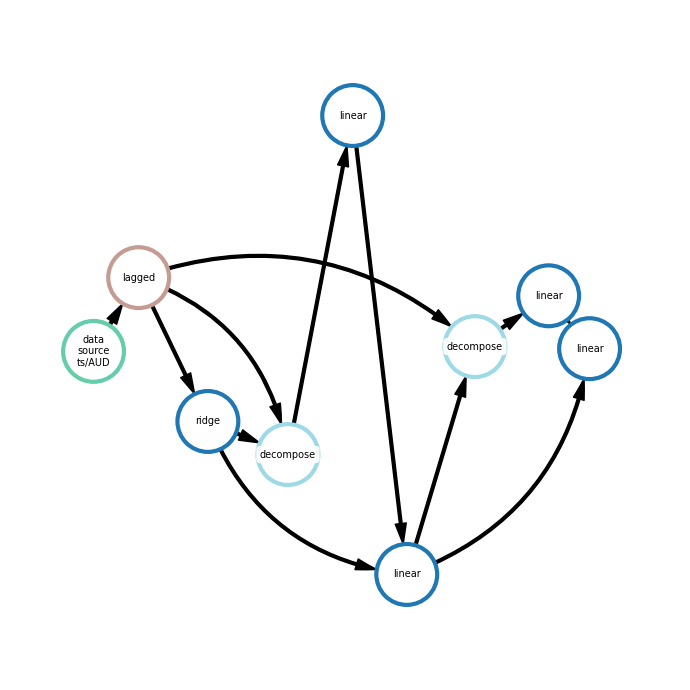

[13.26597118 13.2531483  13.24820375 13.24239208 13.23067656 13.22339178
 13.22907669 13.23670719 13.2394033  13.24276969 13.25535671 13.25035695]
{'mae': 0.074, 'mape': 0.006}


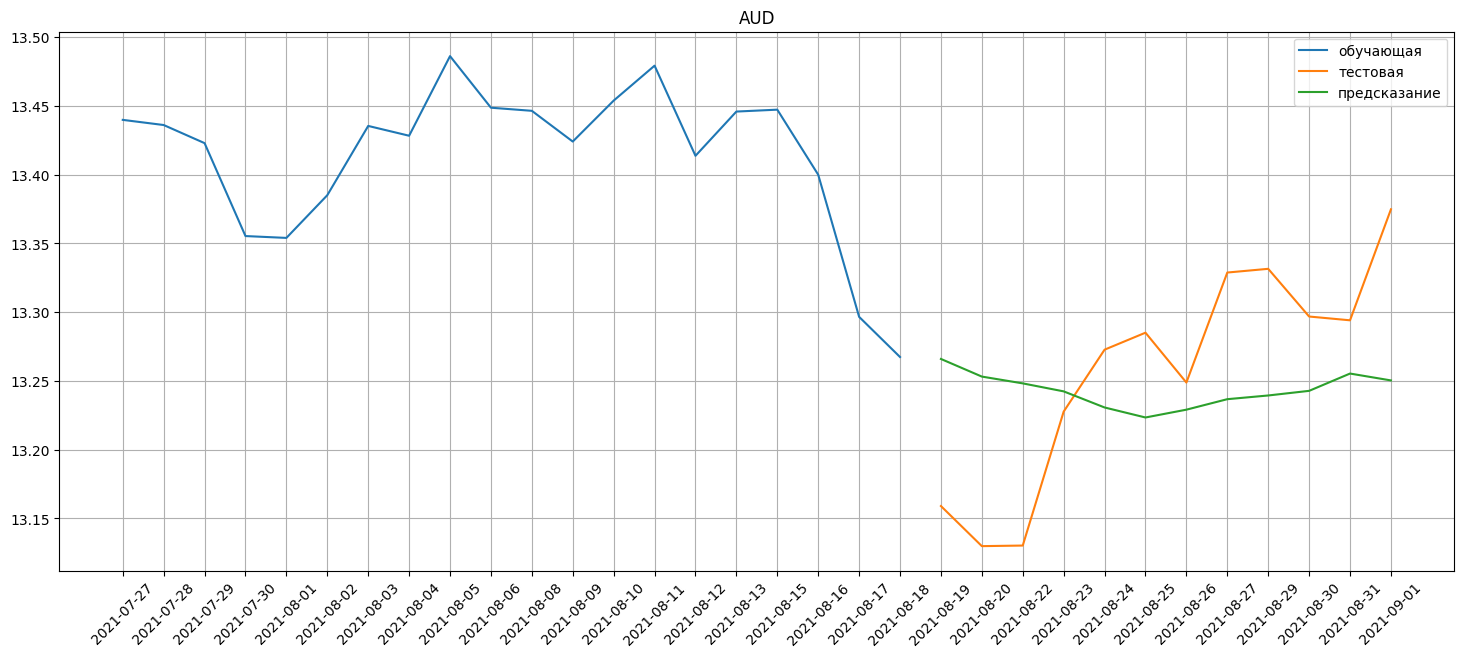


======================================== HUF ========================================
2023-11-13 10:26:39,239 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.4 MiB
2023-11-13 10:26:39,244 - ApiComposer - Initial pipeline was fitted in 16.0 sec.
2023-11-13 10:26:39,249 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 10:26:39,274 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 23 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'la

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 10:40:29,630 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [13:50<?, ?gen/s]

2023-11-13 10:40:29,662 - ApiComposer - Hyperparameters tuning started with 9 min. timeout


2023-11-13 10:40:45,584 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 4, 'nodes': [linear, pca, lagged, data_source_ts/HUF]}
linear - {}
pca - {'svd_solver': 'full', 'n_components': 0.7}
lagged - {'window_size': 10}
data_source_ts/HUF - {} 
Initial metric: 0.000
  0%|          | 30/100000 [08:25<483:39:08, 17.42s/trial, best loss: 0.00026316243898052006]
2023-11-13 10:49:42,626 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 4, 'nodes': [linear, pca, lagged, data_source_ts/HUF]}
linear - {}
pca - {'svd_solver': 'full', 'n_components': 0.7}
lagged - {'window_size': 10}
data_source_ts/HUF - {}
2023-11-13 10:49:42,632 - PipelineTuner - Final metric: 0.000
2023-11-13 10:49:42,636 - ApiComposer - Hyperparameters tuning finished
2023-11-13 10:49:43,070 - ApiComposer - Model generation finished
2023-11-13 10:49:57,081 - FEDOT logger - Final pipeline was fitted
2023-11-13 10:49:57,088 - FEDOT logger - Final pipeline: {'depth': 4, 'length': 4, 'nodes': [linear, pca, lagged

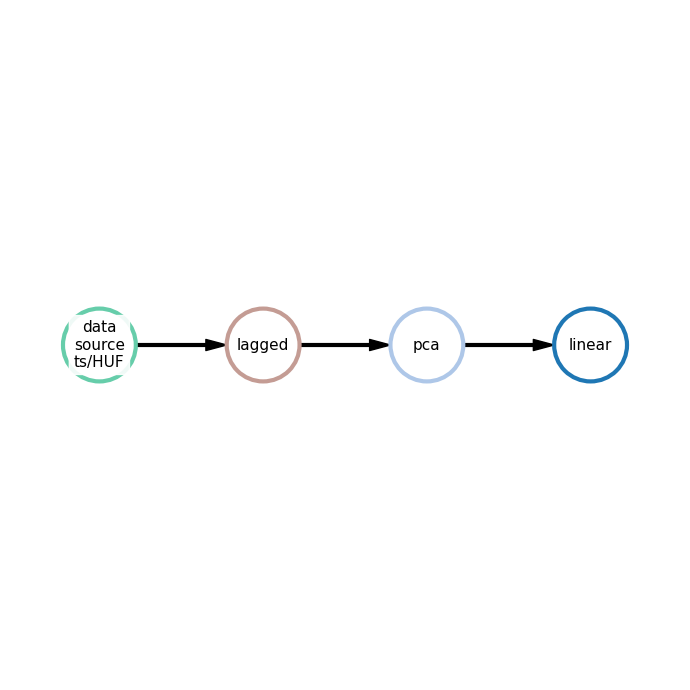

[0.05269221 0.05271342 0.05273556 0.05275673]
{'mae': 0.0, 'mape': 0.004}


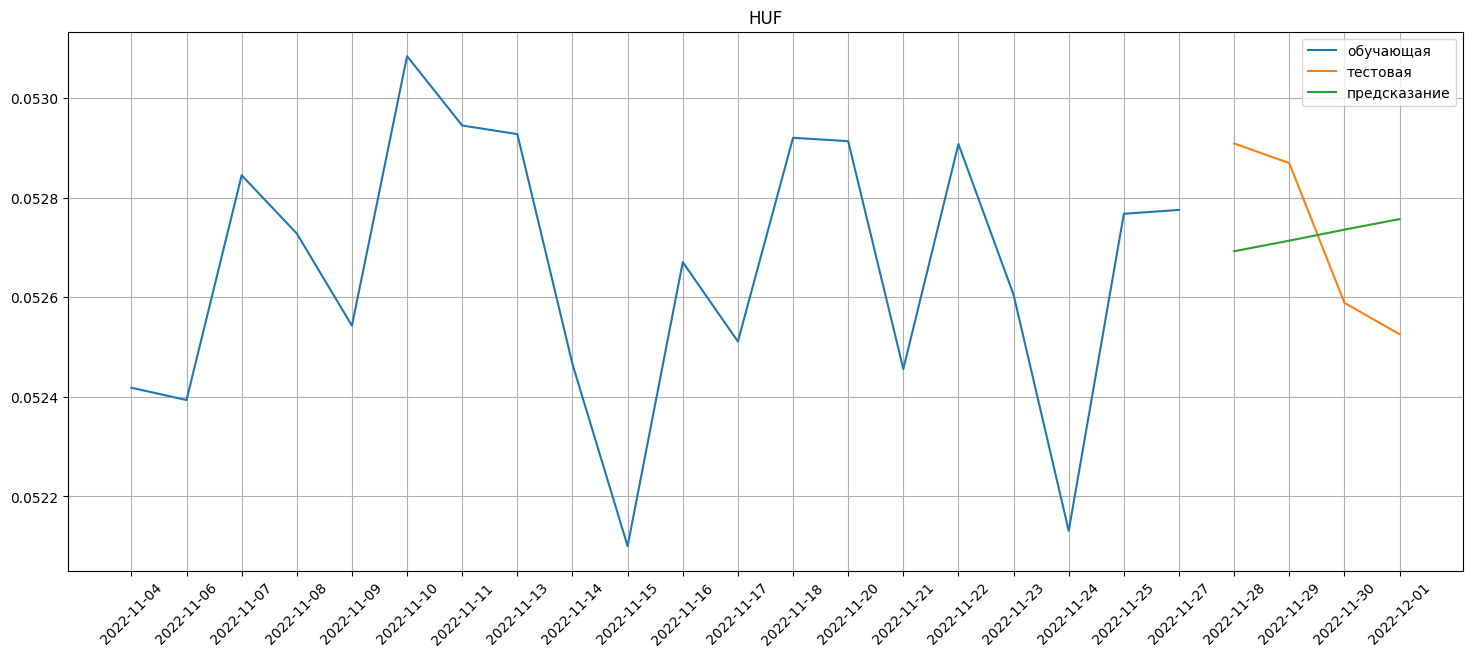


======================================== ISK ========================================
2023-11-13 10:50:18,226 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.1 MiB
2023-11-13 10:50:18,233 - ApiComposer - Initial pipeline was fitted in 14.8 sec.
2023-11-13 10:50:18,239 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 10:50:18,269 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 43 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'la

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 11:04:45,460 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [14:27<?, ?gen/s]

2023-11-13 11:04:45,503 - ApiComposer - Hyperparameters tuning started with 28 min. timeout


2023-11-13 11:05:38,595 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/ISK, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ISK - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.001
  0%|          | 32/100000 [20:44<1570:15:36, 56.55s/trial, best loss: 0.0006636529786111949]
2023-11-13 11:34:30,224 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [rfr, ridge, ridge, glm, data_source_ts/ISK, ridge, lagged, linear, decompose]}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/ISK - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-13 11:34:30,228 - PipelineTuner - Final metric: 0.001
2023-11-13 11:34:30,239 - ApiComposer - Hyperparameters tuning finished
2023-11-13 11:34:30,766 - ApiCompos

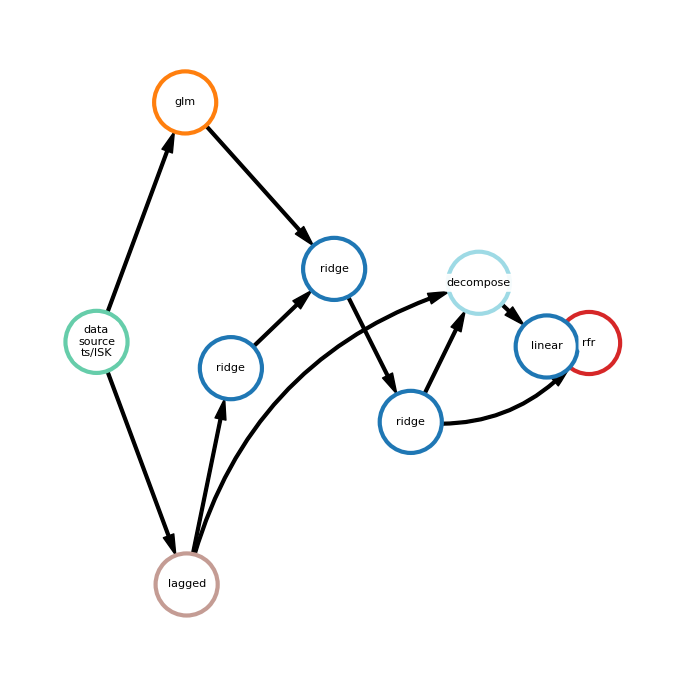

[0.14920798 0.14920395 0.14916627 0.14887272 0.14893706 0.14933374
 0.14942962 0.14924311 0.14924443 0.1491925  0.14890813 0.14958477
 0.14951837 0.14920826 0.14923062]
{'mae': 0.002, 'mape': 0.013}


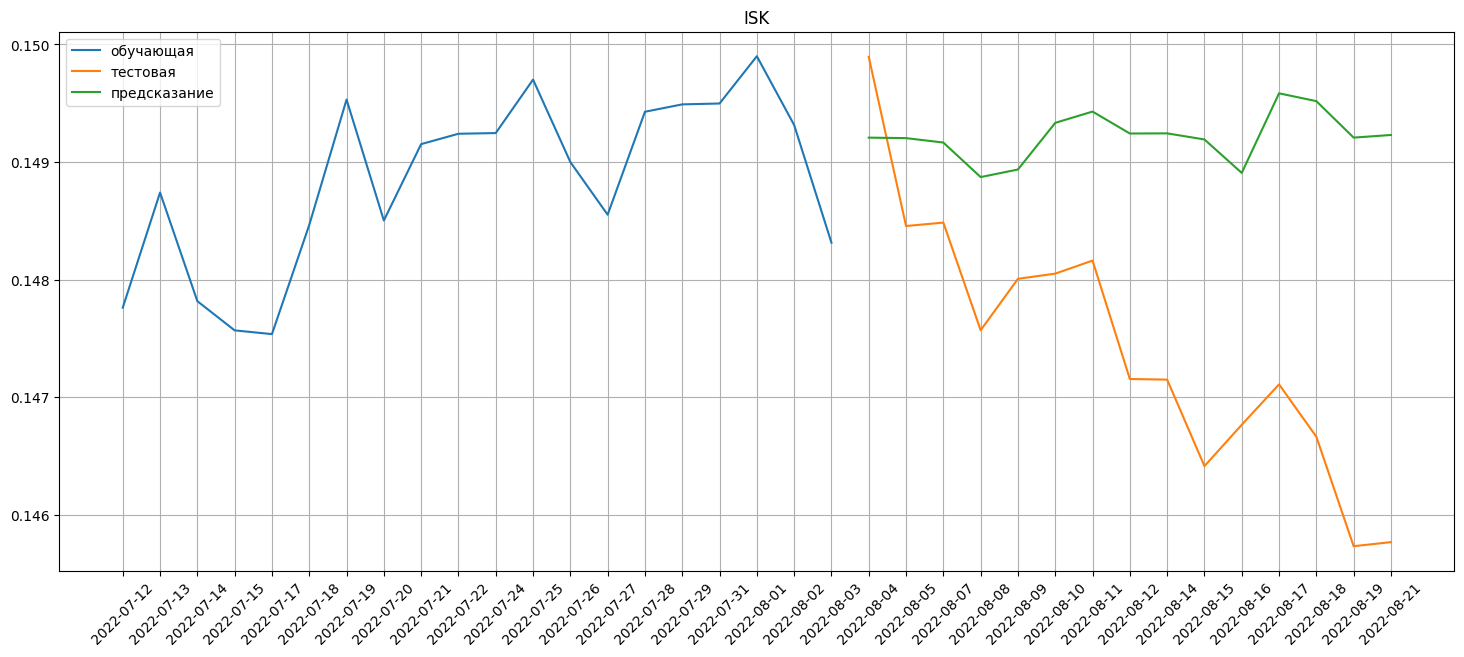


======================================== UAH ========================================
2023-11-13 11:35:43,371 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 1.7 MiB
2023-11-13 11:35:43,374 - ApiComposer - Initial pipeline was fitted in 9.1 sec.
2023-11-13 11:35:43,380 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 11:35:43,404 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 7 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'lass

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 11:39:38,764 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [03:55<?, ?gen/s]

2023-11-13 11:39:38,792 - ApiComposer - Hyperparameters tuning started with 3 min. timeout
2023-11-13 11:39:38,924 - PipelineTuner - Initial pipeline: {'depth': 2, 'length': 2, 'nodes': [glm, data_source_ts/UAH]}
glm - {'family': 'gamma', 'link': 'identity'}
data_source_ts/UAH - {} 
Initial metric: 0.000


  1%|          | 1095/100000 [02:55<4:23:28,  6.26trial/s, best loss: 0.00038349394166540705]
2023-11-13 11:42:34,114 - PipelineTuner - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [glm, data_source_ts/UAH]}
glm - {'family': 'gamma', 'link': 'identity'}
data_source_ts/UAH - {}
2023-11-13 11:42:34,118 - PipelineTuner - Final metric: 0.000
2023-11-13 11:42:34,151 - ApiComposer - Hyperparameters tuning finished
2023-11-13 11:42:34,634 - ApiComposer - Model generation finished
2023-11-13 11:42:34,722 - FEDOT logger - Final pipeline was fitted
2023-11-13 11:42:34,727 - FEDOT logger - Final pipeline: {'depth': 2, 'length': 2, 'nodes': [glm, data_source_ts/UAH]}
glm - {'family': 'gamma', 'link': 'identity'}
data_source_ts/UAH - {}
Memory consumption for finish in main session: current 2.3 MiB, max: 6.2 MiB


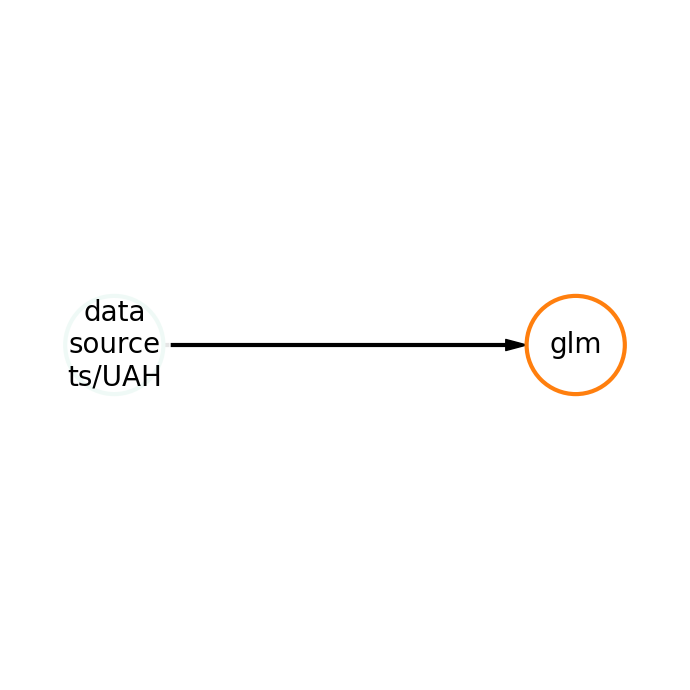

[0.65169467 0.65167865]
{'mae': 0.008, 'mape': 0.012}


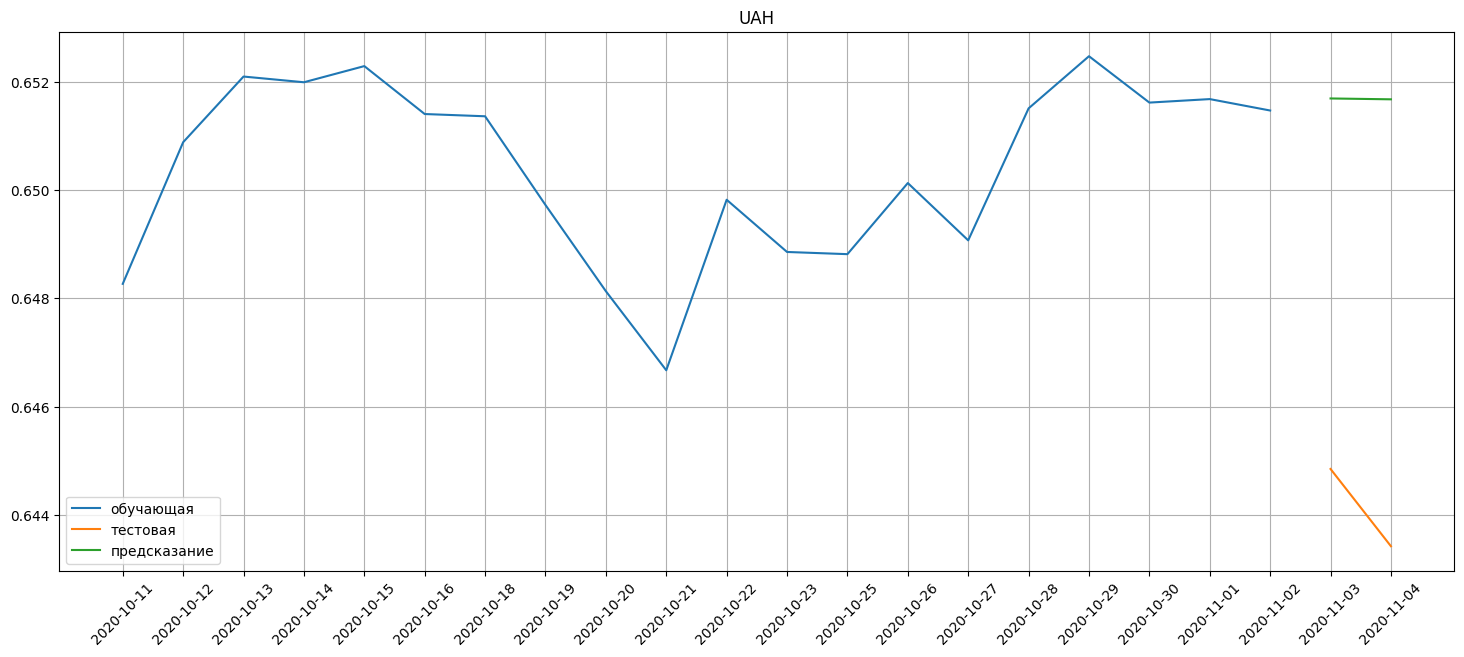


======================================== TRY ========================================
2023-11-13 11:42:52,869 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.2 MiB
2023-11-13 11:42:52,873 - ApiComposer - Initial pipeline was fitted in 14.9 sec.
2023-11-13 11:42:52,880 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 11:42:52,910 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 8 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'las

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-13 11:47:42,095 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [04:49<?, ?gen/s]

2023-11-13 11:47:42,137 - ApiComposer - Hyperparameters tuning started with 3 min. timeout


2023-11-13 11:48:28,164 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/TRY, ridge, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {'alpha': 1.16507141619544}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/TRY - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.008
 50%|█████     | 5/10 [03:29<03:29, 41.93s/trial, best loss: 0.00836732281023278]
2023-11-13 11:51:57,869 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-13 11:52:37,986 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [linear, ridge, ridge, glm, data_source_ts/TRY, ridge, lagged, linear, decompose]}
linear - {}
ridge - {}
ridge - {'alpha': 1.16507141619544}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/TRY - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-13 11:52:37,991 - PipelineTuner - 

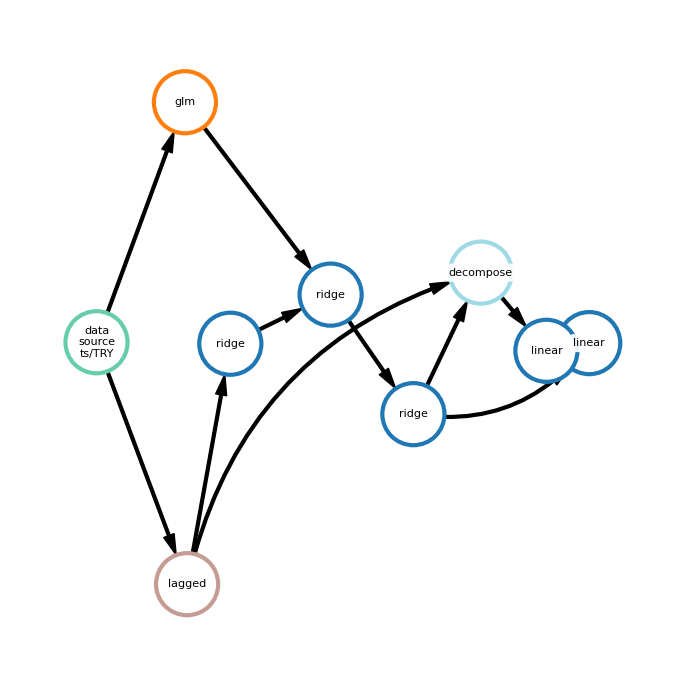

[1.29824265 1.29942155 1.29794574 1.29769373 1.29744327 1.2942642
 1.29316604 1.29330909 1.2906462  1.2896297 ]
{'mae': 0.012, 'mape': 0.009}


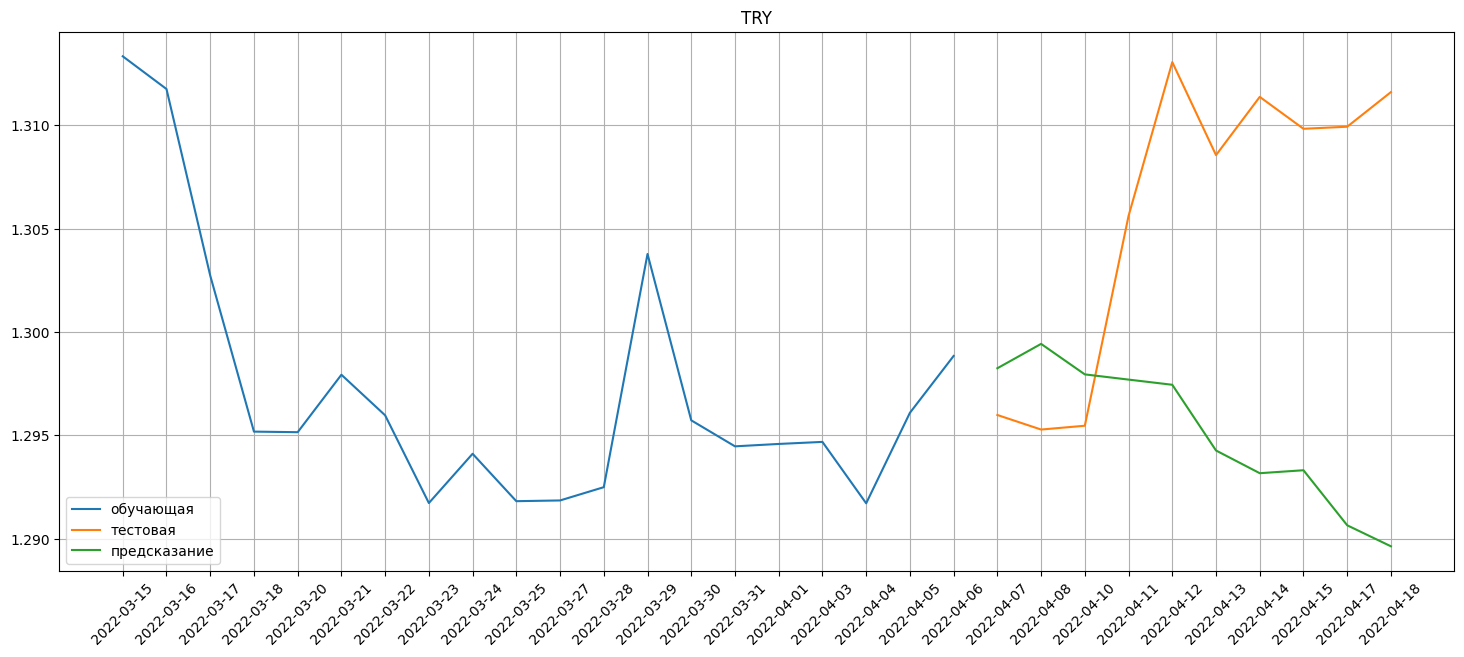


======================================== PKR ========================================
2023-11-13 11:53:44,172 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-13 11:53:44,177 - ApiComposer - Initial pipeline was fitted in 13.2 sec.
2023-11-13 11:53:44,181 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 11:53:44,205 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 17 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'la

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 12:04:03,083 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [10:18<?, ?gen/s]

2023-11-13 12:04:03,127 - ApiComposer - Hyperparameters tuning started with 6 min. timeout


2023-11-13 12:05:28,518 - PipelineTuner - Initial pipeline: {'depth': 11, 'length': 12, 'nodes': [gbr, adareg, ridge, ridge, glm, data_source_ts/PKR, ridge, lagged, linear, decompose, linear, decompose]}
gbr - {}
adareg - {}
ridge - {}
ridge - {'alpha': 1.1648513929935065}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PKR - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.001
 50%|█████     | 5/10 [07:29<07:29, 89.99s/trial, best loss: 0.00082188904084442]
2023-11-13 12:12:58,556 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-13 12:14:31,351 - PipelineTuner - Final pipeline: {'depth': 11, 'length': 12, 'nodes': [gbr, adareg, ridge, ridge, glm, data_source_ts/PKR, ridge, lagged, linear, decompose, linear, decompose]}
gbr - {}
adareg - {}
ridge - {}
ridge - {'alpha': 1.1648513929935065}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PKR - {}
ridge - 

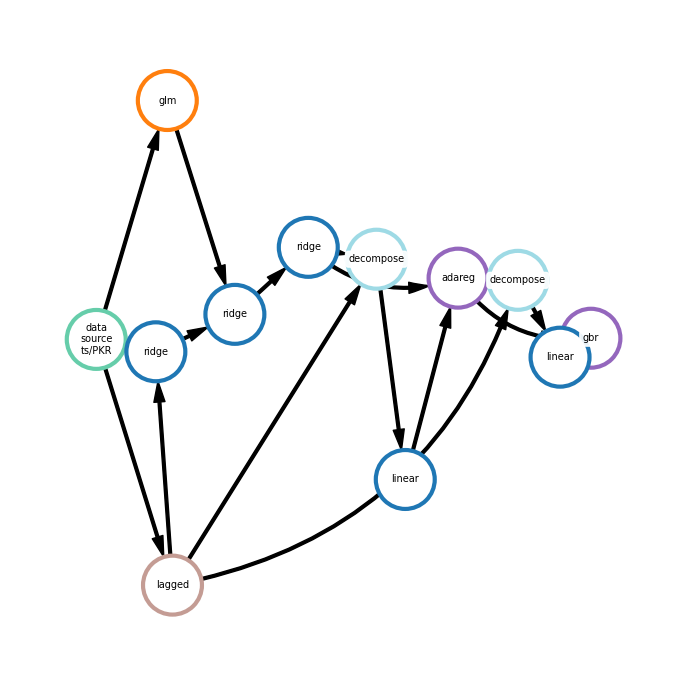

[0.10718159 0.10726952]
{'mae': 0.0, 'mape': 0.003}


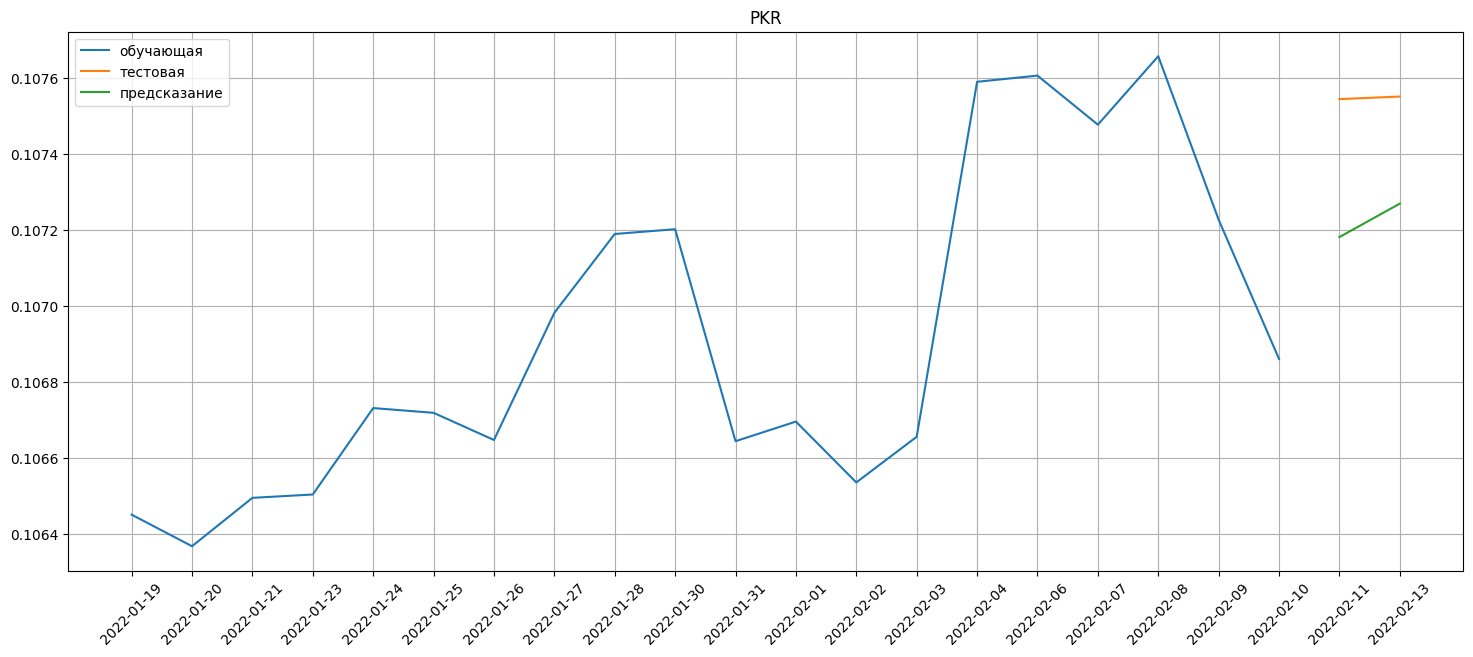


======================================== KWD ========================================
2023-11-13 12:16:41,708 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.6 MiB
2023-11-13 12:16:41,716 - ApiComposer - Initial pipeline was fitted in 12.1 sec.
2023-11-13 12:16:41,724 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 12:16:41,754 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 25 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'la

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 12:30:52,954 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [14:11<?, ?gen/s]

2023-11-13 12:30:52,995 - ApiComposer - Hyperparameters tuning started with 11 min. timeout


2023-11-13 12:31:07,298 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, fast_ica, glm, data_source_ts/KWD, ridge, sparse_lagged]}
ridge - {}
fast_ica - {'whiten': 'unit-variance'}
glm - {'family': 'inverse_gaussian', 'link': 'identity'}
data_source_ts/KWD - {}
ridge - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 1.038
  0%|          | 32/100000 [09:01<683:16:41, 24.61s/trial, best loss: 0.1364259252943682]
2023-11-13 12:42:10,437 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [ridge, fast_ica, glm, data_source_ts/KWD, ridge, sparse_lagged]}
ridge - {'alpha': 3.451485570593322}
fast_ica - {'whiten': 'unit-variance', 'fun': 'logcosh', 'n_components': 19}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/KWD - {}
ridge - {'alpha': 0.8043595762600635}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
2023-1

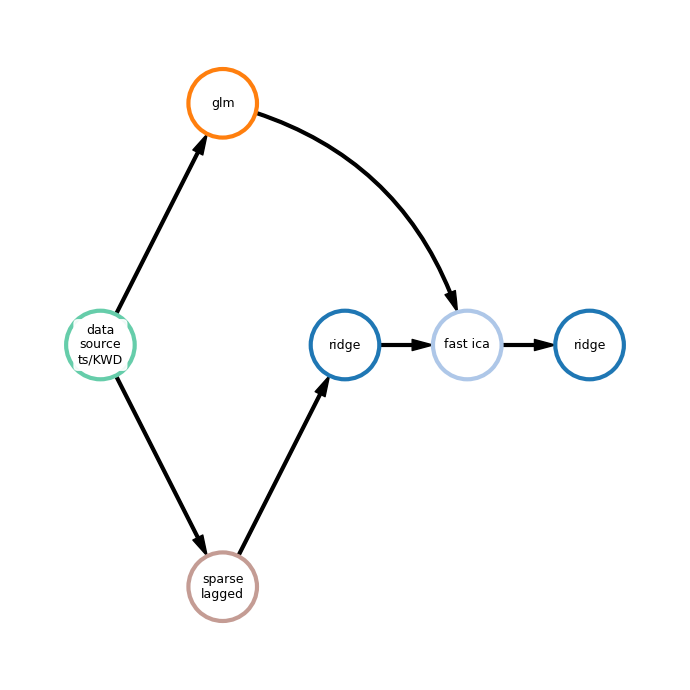

[60.85647325 60.8528071  60.85728858 60.84033159 60.85785989 60.85202236
 60.87811749 60.85970119 60.90116278 60.87499557 60.89824239 60.89367457
 60.90845934 60.92443512 60.93932373]
{'mae': 0.145, 'mape': 0.002}


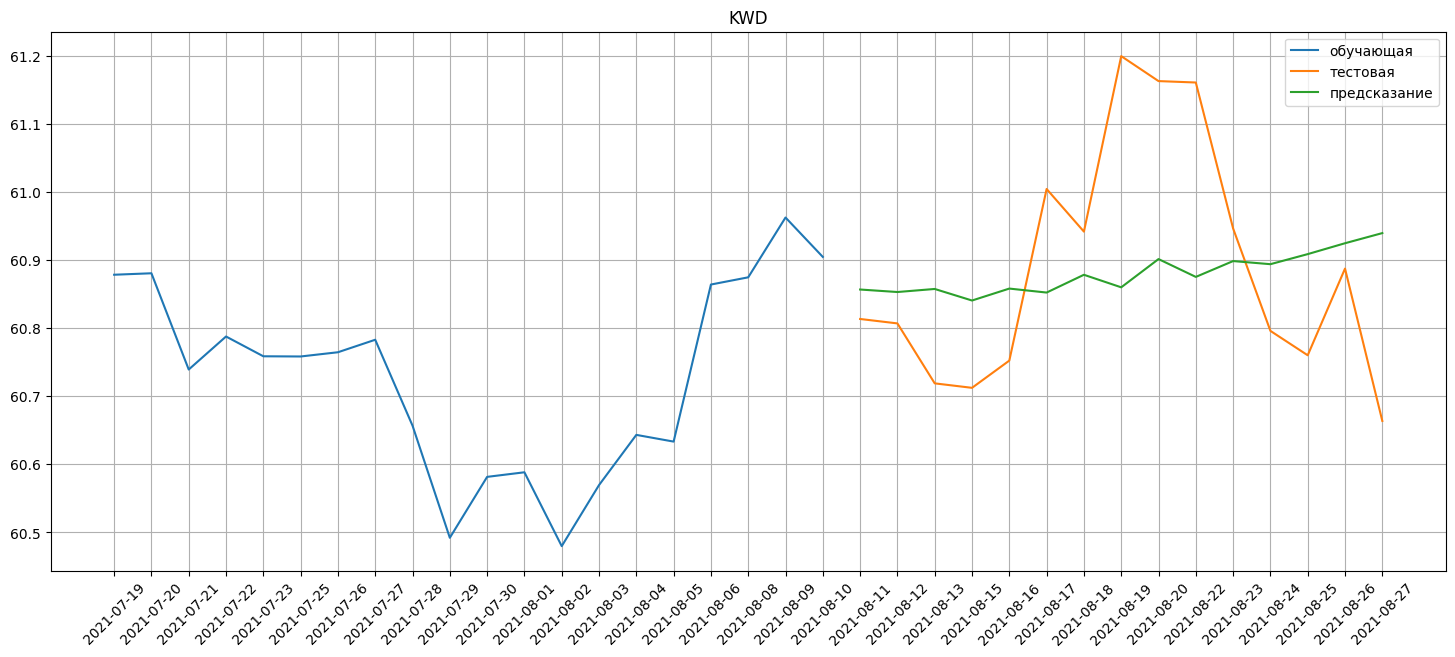


======================================== RUB ========================================
2023-11-13 12:43:00,658 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.8 MiB
2023-11-13 12:43:00,662 - ApiComposer - Initial pipeline was fitted in 19.9 sec.
2023-11-13 12:43:00,668 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 12:43:00,694 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 58 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'la

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-13 13:16:23,035 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [33:22<?, ?gen/s]

2023-11-13 13:16:23,065 - ApiComposer - Hyperparameters tuning started with 24 min. timeout


2023-11-13 13:16:44,561 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/RUB, lgbmreg, sparse_lagged]}
ridge - {'alpha': 9.861275359095652}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RUB - {}
lgbmreg - {'num_leaves': 32, 'colsample_bytree': 0.8, 'subsample': 0.8, 'subsample_freq': 10, 'learning_rate': 0.03, 'n_estimators': 100}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.002
  0%|          | 40/100000 [20:55<1162:05:00, 41.85s/trial, best loss: 0.0019970168936165847]
2023-11-13 13:41:24,303 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/RUB, lgbmreg, sparse_lagged]}
ridge - {'alpha': 2.8865498192744203}
glm - {'family': 'gamma', 'link': 'inverse_power'}
data_source_ts/RUB - {}
lgbmreg - {'num_leaves': 138, 'colsample_bytree': 0.9402423921710652, 'subsample': 0.4759045099505703, 'subsample_fre

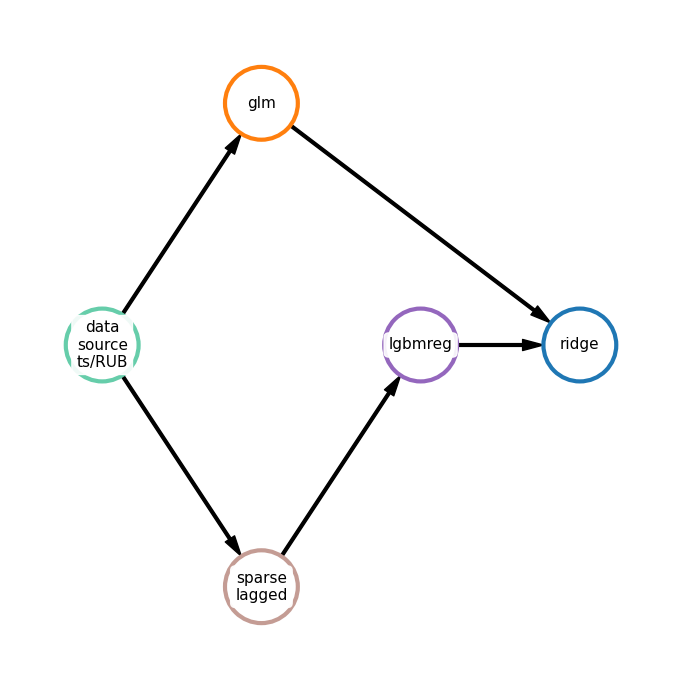

[0.2686805  0.26867996 0.26867894 0.26867879 0.26868157 0.26868253]
{'mae': 0.006, 'mape': 0.024}


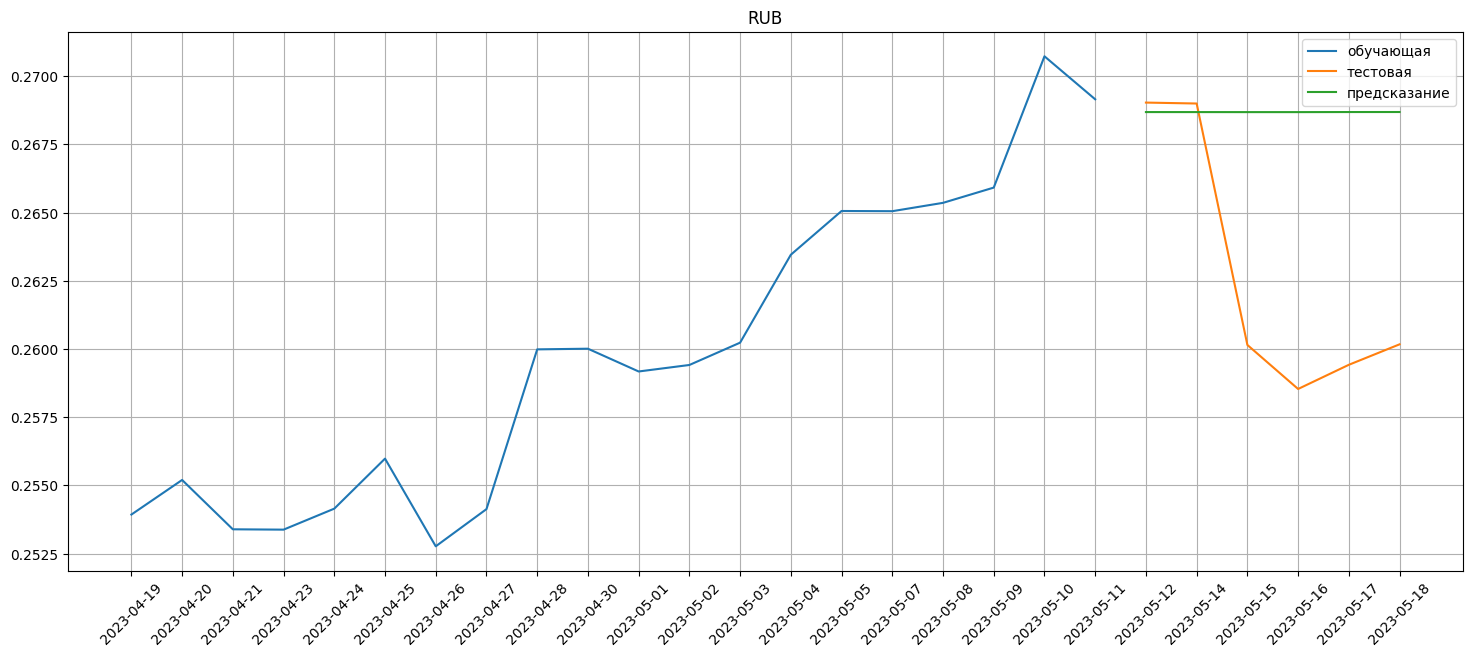


======================================== PLN ========================================
2023-11-13 13:42:48,205 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.6 MiB
2023-11-13 13:42:48,210 - ApiComposer - Initial pipeline was fitted in 16.9 sec.
2023-11-13 13:42:48,215 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-13 13:42:48,252 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 52 min. Set of candidate models: ['clstm', 'gaussian_filter', 'smoothing', 'lagged', 'arima', 'diff_filter', 'ar', 'locf', 'ets', 'stl_arima', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'exog_ts', 'pca', 'linear', 'rfr', 'ransac_lin_reg', 'scaling', 'treg', 'smoothing', 'dtreg', 'locf', 'ridge', 'gbr', 'ts_naive_average', 'cut', 'fast_ica', 'normalization', 'adareg', 'poly_features', 'svr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'la

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-13 15:44:48,283 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [2:02:00<?, ?gen/s]

2023-11-13 15:44:48,328 - ApiComposer - Time for pipeline composing was 2:02:00.051449.
The remaining 70.3 seconds are not enough to tune the hyperparameters.
2023-11-13 15:44:48,333 - ApiComposer - Composed pipeline returned without tuning.


2023-11-13 15:44:48,798 - ApiComposer - Model generation finished
2023-11-13 15:45:28,243 - FEDOT logger - Final pipeline was fitted
2023-11-13 15:45:28,247 - FEDOT logger - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [treg, ridge, ridge, glm, data_source_ts/PLN, ridge, lagged, linear, decompose]}
treg - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/PLN - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
Memory consumption for finish in main session: current 1.1 MiB, max: 50.8 MiB


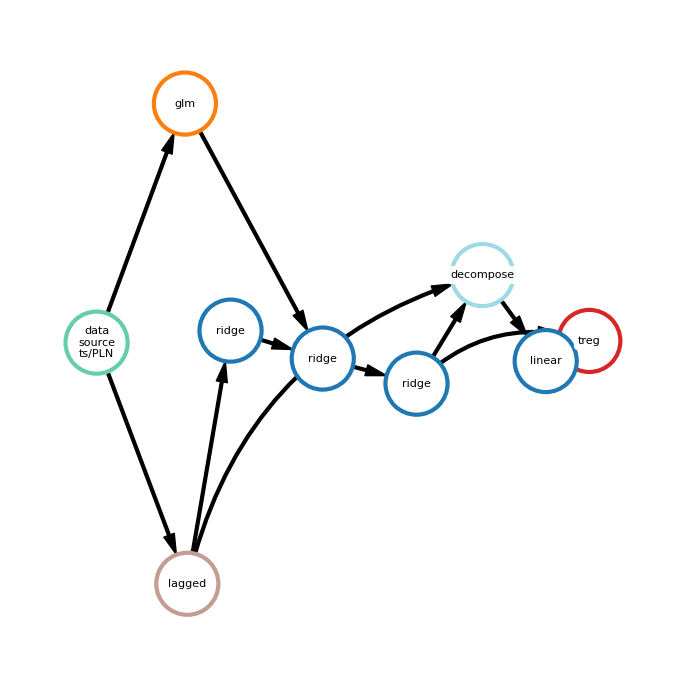

[4.75153286 4.74699995 4.72936305 4.72870654 4.73912162 4.75058301
 4.75742251 4.75945203]
{'mae': 0.043, 'mape': 0.009}


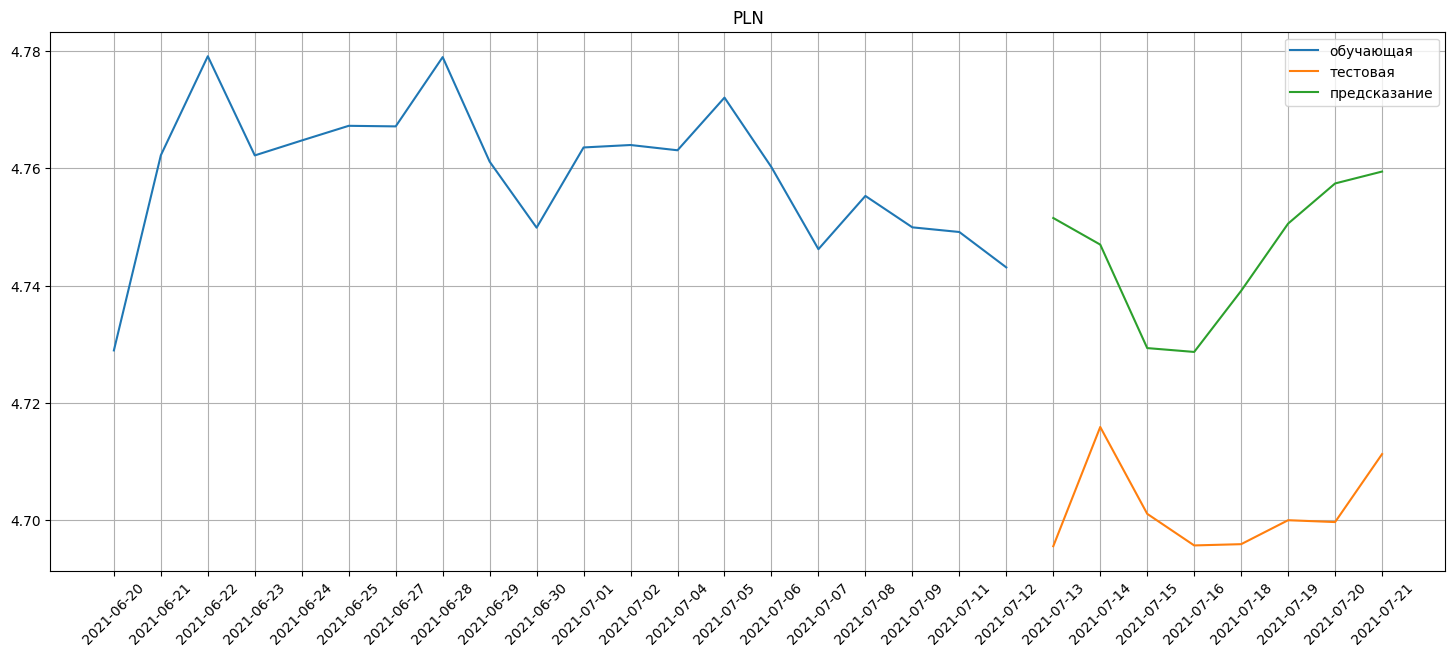


======================================== GBP ========================================
2023-11-13 15:45:50,223 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.3 MiB
2023-11-13 15:45:50,229 - ApiComposer - Initial pipeline was fitted in 17.6 sec.
2023-11-13 15:45:50,235 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-13 15:45:50,258 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 28 min. Set of candidate models: ['gaussian_filter', 'smoothing', 'lagged', 'diff_filter', 'ar', 'locf', 'ets', 'ts_naive_average', 'cut', 'polyfit', 'glm', 'sparse_lagged', 'normalization', 'pca', 'linear', 'adareg', 'rfr', 'diff_filter', 'ar', 'ransac_non_lin_reg', 'lasso', 'ransac_lin_reg', 'glm', 'sparse_lagged', 'scaling', 'gaussian_filter', 'smoothing', 'lagged', 'dtreg', 'locf', 'ridge', 'sgdr', 'ets', 'ts_naive_average', 'cut', 'polyfit'].
2023-11-1

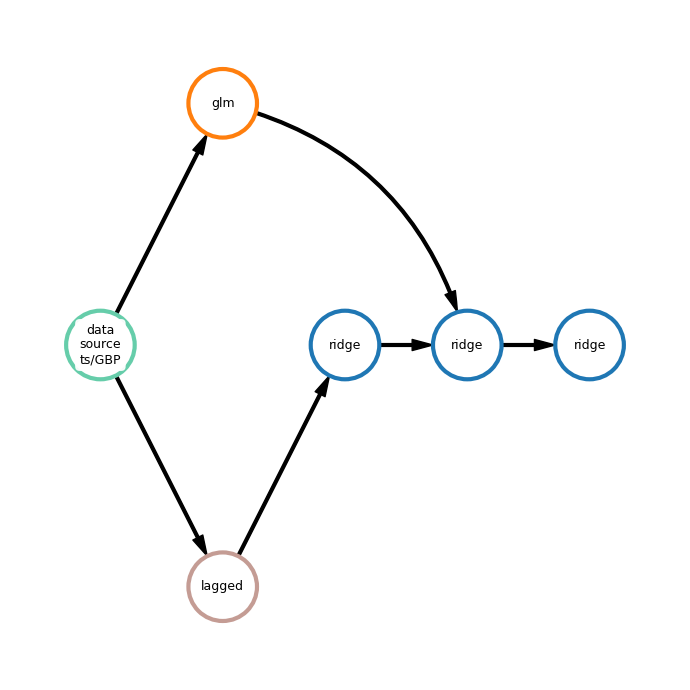

[24.73171523 24.73922096 24.74791752 24.75193319]
{'mae': 0.032, 'mape': 0.001}


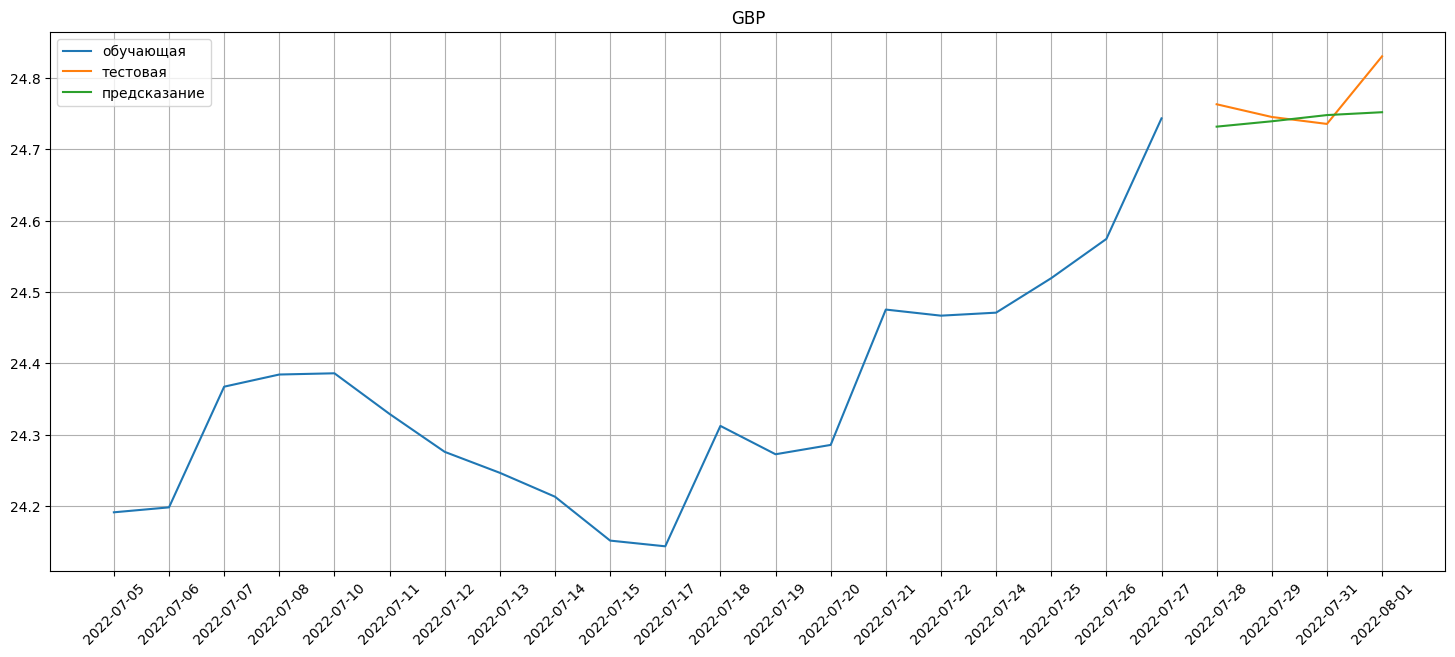

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
125,"(2023, 11, 13, 11, 53, 25, 0, 317, 0)",PKR,2,546,17,0.003
126,"(2023, 11, 13, 12, 16, 16, 0, 317, 0)",KWD,15,691,25,0.002
127,"(2023, 11, 13, 12, 42, 26, 0, 317, 0)",RUB,6,152,58,0.024
128,"(2023, 11, 13, 13, 41, 48, 0, 317, 0)",PLN,8,723,52,0.009


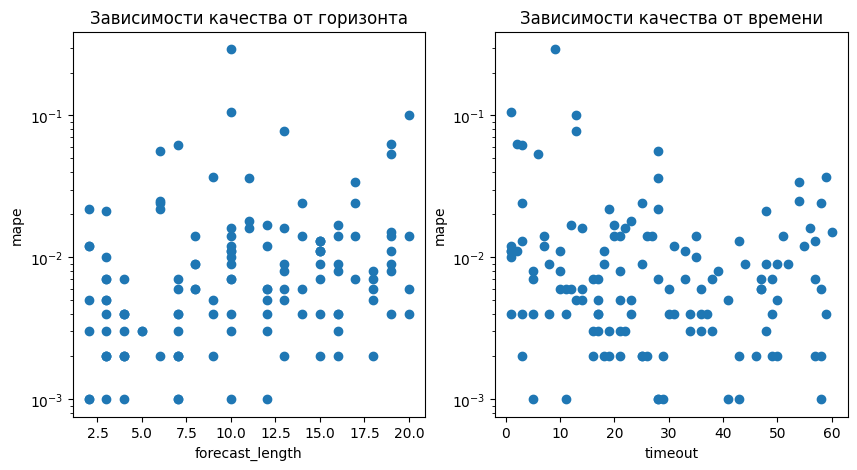

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

plt.show()